<img src="../../thu_sigs_logo.png" alt="清华深研院-横" style="zoom:50%;" />

In [1]:
#| hide
#| default_exp hidden_markov_model.vis
# pdf:
#   toc: true
#   docx: default

In [2]:
#|hide
%load_ext autoreload
%autoreload 2
%load_ext rich

In [3]:
#|hide
from scholarly_infrastructure.logging.nucleus import logger, print
from thu_big_data_ml.help import plt, pio
import treescope

In [4]:
#|hide
treescope.active_autovisualizer.set_globally(treescope.ArrayAutovisualizer())

In [5]:
#| hide 
import nbdev; nbdev.nbdev_export()

::: {.callout-important}
本文档具有一定的交互性，建议使用浏览器打开html文件，这样比pdf文件阅读体验更佳。
:::

## 第一题——一个例子理解 因子分解 {#sec-1}

> 写出图中无向图描述的概率图模型的因子分解式。

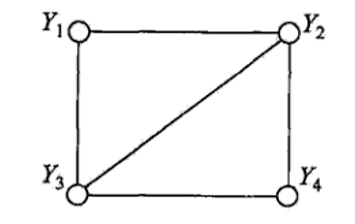



### 审题 {#sec-1-analysis}

我们首先复习一下李航书上的内容和课件上的内容。

最主要的问题在于，什么是因子分解？

- 首先，因子分解全称是概率无向图模型(probabilistic undirected graphical mode)的因子分解(factorization)。
- 词源是数学上的多项式因式分解 (Polynomial Factorization)。意思是把一个数学对象分解为多个因子(factor)的乘积。
    - 其中 整数分解 (Integer Factorization) 是一个著名的问题，其决策问题大家怀疑是NP-intermediate，并且怀疑不存在多项式算法。
    - 注意，推荐系统中的因子分解机 (Factorization Machine) 和这里的因子分解不是一个概念。

- 概率无向图和概率有向图（贝叶斯网络）有所不同。上节课的HMM是以有向图来表达的，这就是贝叶斯网络，有向边表示了因果关系。而概率无向图是用无向图来表达的，边表示了相关关系。
    - 贝叶斯网络也有其对应的因子分解性质。PRML书上叫做Factorization properties。

- 如何理解几个马尔可夫性？阅读课本和课件后，我个人的一个理解方式。
    - 我的理解在于，首先概率无向图这个图里面有些节点，有时候被观察到的具体值，有时候是还没观察到的随机变量。而知道其中一部分节点的值，其他的随机变量的分布会被影响。
    - 所谓随机变量A, B的无关，有两个等价定义，一个就是说 P(A, B) = P(A)P(B)，另一个就是说 P(A|B) = P(A)。后者就是在说，就算我知道了B的值，A的分布也不会受到影响。
    - 好，我们首先考虑，如果节点的值都不知道，那只要两个节点之间有图的路径，那么这两个节点之间的分布是相关的，因为会被路径所影响。
    - 然后，现在如果我们先知道了一部分节点集合O的值，和这些节点有路径的节点的分布自然会受到影响。关键的地方来了，我们再考虑另外两个随机变量A和B，原本他们有路径，现在被这些已知值的节点集合O给隔开了，那么这两个节点之间的分布就是独立的了。这就是成对马尔可夫性。
    - 其他的马尔可夫性也是完全类似的，关键的假设实际上在于，**已知值的节点能“挡住”依赖路径**。
    - 马尔可夫性实际上是马尔科夫网络/随机场我们的假设。在PRML书上，也叫做马尔科夫网络的 Conditional independence properties，贝叶斯网络用的是d-separation方法，而马尔科夫网络其实更加简单，就是路径切断。


- 条件随机场是一种特殊的马尔科夫随机场。



复习之后，我们来看看题目询问的问题。本题我们需要把因子分解式写出来。

### 解题 {#sec-1-solution}



#### 解法一：手工推导法（考试写解答题）

首先复习无向图的团(clique)的概念，比起直接参考文献不知道为什么的定义，我喜欢从单词的原意出发。
- 英语单词clique原本的牛津释义是 "a small group of people who spend their time together and do not allow others to join them", 派系。
- 所谓"spend their time together", 在无向图中就是两两之间都有边连接。我们把这个定义为无向图的团(clique)。
- 所谓"do not allow others to join them", 就是说，如果再任意加上一个无向图中的节点就没法两两连接了，满足这个性质叫做无向图的最大团 (maximal clique)。
    - 注意，"最大团"其实应该叫做极大团 (local maximal clique)，李航翻译不妥。所以一个无向图中可以有多个极大团，最大的极大团为最大团 (也有可能有多个)。
    - 中文数学语境中，“最大”是指“全局最大”(global maximum)，而“极大”是指“局部最大”(local maximum)，一个函数的极大值有很多个，最大值只有一个（取值的点也可以有多个）。
    - 比如所谓“极大似然估计” (Maximum Likelihood Estimation) 就是因为我们之前推导的时候很多时候忘记了“导数为0”只是必要条件，所以得到的是“局部最大”，而不是“全局最大”，所以要这样翻译才恰当。


本题的条件随机场的结构比较简单，我们从图中看出极大团有且仅有两个，分别是{$Y_1, Y_2, Y_3$}和{$Y_4, Y_2, Y_3$}。

我们之所以要把图的极大团找出来，是因为我们要尝试表达马尔科夫网络（概率无向图）模型的联合概率分布，这个其实没有上次作业介绍到的贝叶斯网络的分解方式那么简单，需要用到Hammersley-Clifford定理。

根据李航书上的Hammersley-Clifford定理
> 定理11.1（Hammersley-Clifford定理）概率无向图模型的联合概率分布 $P(Y)$ 可以表示为如下形式：  $P(Y)=\frac{1}{Z}\prod_C\Psi_C(Y_C)$  
> $Z=\sum_Y\prod_C\Psi_C(Y_C)$  
> 其中，C是无向图的最大团，Y<sub>C</sub>是C的结点对应的随机变量，$\Psi_C(Y_C)$ 是C上定义的严格正函数，乘积是在无向图所有的最大团上进行的。

这个定义其实并不是表面上那么好理解，最让人费解的当然是 $\Psi_C(Y_C)$ ，李航没有说清楚，$\Psi_C(Y_C)$ 是**一个设计好的固定的函数**，还是**只要是正函数都可以**？

其实我们推导这个问题要循序渐进，我们只不过是想要联合概率分布，然后知道了网络具有成对马尔科夫性质。我们想要一个乘式，而基础的成对马尔可夫性 $P(x_i, x_j | x_{\backslash \{i, j\}}) = P(x_i | x_{\backslash \{i, j\}}) \times P(x_j | x_{\backslash \{i, j\}})$ 就给了我们一个最基础的乘式，我们想要把这个条件无关的性质保留下来，一直乘下去，所以我们才用到了团的概念。
- note: 把x_i和x_j自己当做是不同的团，也许，排除的变量就去掉了？

PRML书上解释，“we do not restrict the choice of potential functions to those that have a specific probabilistic interpretation as marginal or conditional distributions.”，所以就是说，$\Psi_C(Y_C)$ 可以是任意的正函数，只要是正函数就可以。而贝叶斯网络的因子分解就是条件概率分布。不过势能函数当然也可以是条件概率分布，只不过不一定是。

理解了Hammersley-Clifford定理之后，我们就可以给出题目的解答了。

$$\begin{aligned}P(Y)&=\frac{\Psi_{(1,2,3)}(Y_{(1,2,3)})\cdot\Psi_{(4,2,3)}(Y_{(4,2,3)})}{\sum_Y\left[\Psi_{(1,2,3)}(Y_{(1,2,3)})\cdot\Psi_{(4,2,3)}(Y_{(4,2,3)})\right]}\end{aligned}$$

其中按照李航书上所说，势能函数$\Psi$可以取 $\Psi_C (Y_C) = \exp (-E(Y_C))$, 需要特别注意这里的$E$不是期望，而是能量函数 (energy function)。PRML书上用$\mathbb{E}$表示期望，$E$表示能量函数，而李航书上没有明确区分，很容易让李航书的读者误以为这个是期望。

根据PRML书，$\Psi_C (Y_C)$ 可以认为是玻尔兹曼分布 (Boltzmann distribution) 的密度函数。
参考 https://en.wikipedia.org/wiki/Boltzmann_distribution , 玻尔兹曼分布又称吉布斯分布 (Gibbs distribution) , 是统计物理学中的一个概念，系统离散的状态，根据每个状态的能量大小，以及系统的温度，决定出位于这个状态的概率，能量越低，概率越大，这里面能量就真的是物理学的能量。

最近获得诺贝尔物理学奖的[玻尔兹曼机 (Boltzmann machine)](https://en.wikipedia.org/wiki/Boltzmann_machine) 就是一种马尔科夫随机场。


那么具体的能量函数是什么呢？具体而言，如果是用于图像去噪问题，根据袁老师的课件，我们可以取

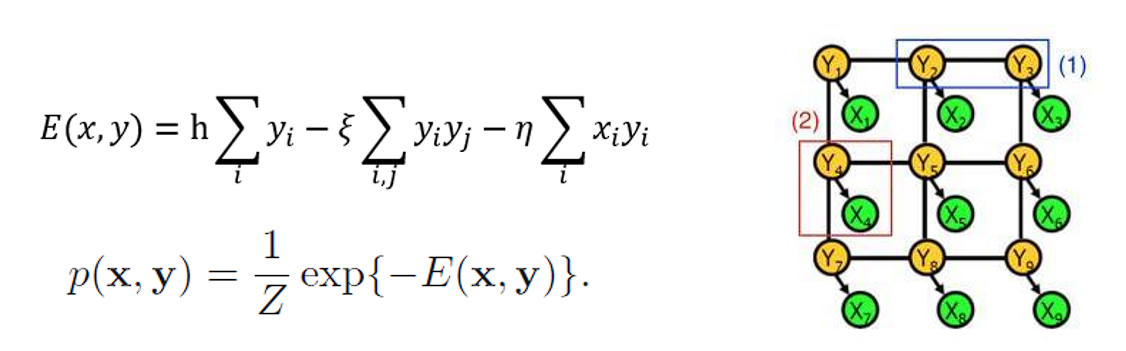

## 第二题——一个例题理解条件随机场的矩阵形式 {#sec-2}

题目如下
> $ 参考图 11.6 的状态路径图，假设随机矩阵 M_1(x),M_2(x),M_3(x),M_4(x)$ 分别是
>
> $M_1(x)=\begin{bmatrix}0 & 0\\ 0.5 & 0.5\end{bmatrix},M_2(x)=\begin{bmatrix}0.3 & 0.7\\ 0.7 & 0.3\end{bmatrix}$
>
> $M_3(x)=\begin{bmatrix}0.5 & 0.5\\ 0.6 & 0.4\end{bmatrix},M_4(x)=\begin{bmatrix}0 & 1\\ 0 & 1\end{bmatrix}$
>
> 求以 start=2 为起点、以 stop=2 为终点的所有路径的状态序列 y 的概率及概率最大的状态序列。


### 审题

我们首先复习一下李航书上的内容和课件上的内容。

- 什么是条件随机场？
    - 条件随机场是个更加特殊的概率无向图模型。
    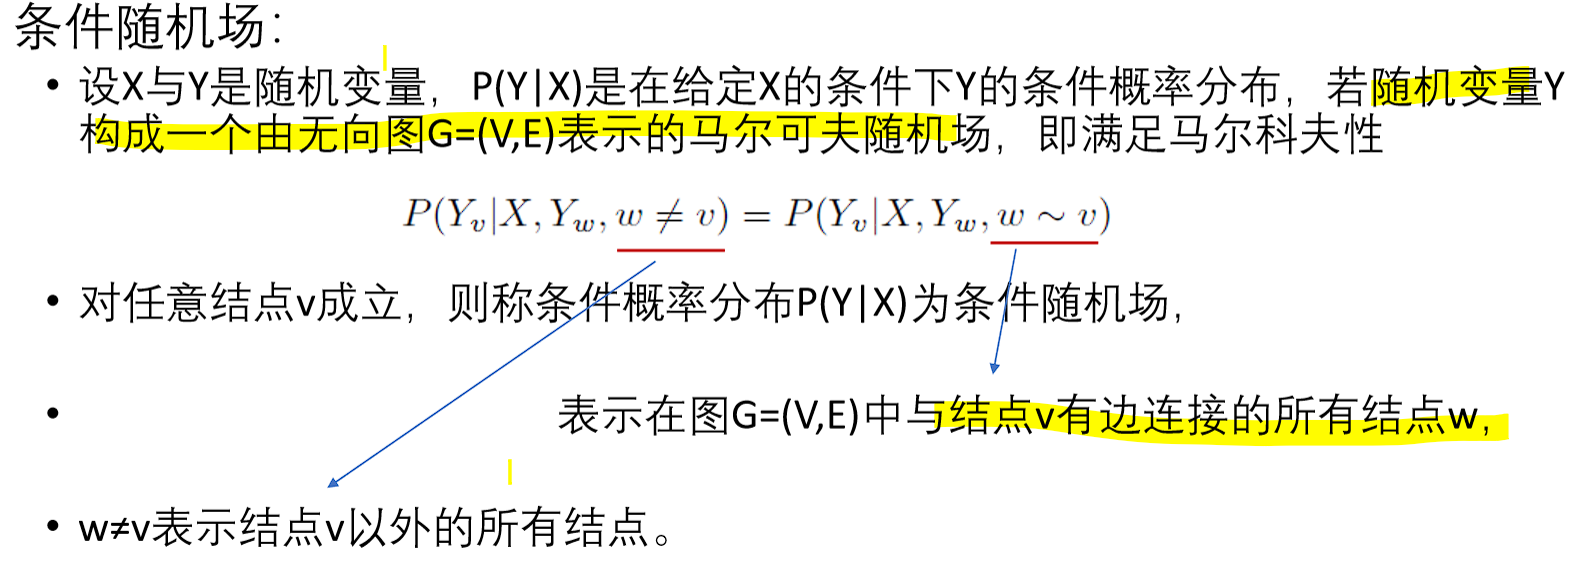
- 这个定义有几个点需要特别注意。
    - 首先，X不一定是马尔科夫随机场，X就是X，随机变量，或者随机向量。
        - 很多时候，每一个Y有一个对应的X。不要错误地以为X是Y的子集，
        - 不，Y是自己的马尔科夫随机场，X是额外加进去的。
    - 其次，这里的马尔科夫性与马尔科夫随机场的马尔可夫性我认为大有不同。
        - 这里强调的是说，如果X已知了，原本的马尔科夫随机场的条件独立性质进一步简化，
        - 原本需要阻挡路径才能条件独立，现在X明明没有阻挡路径，就可以直接让Y之间直接强行独立，除了相邻的Y会依赖。
- 什么是线性链条件随机场？
    
    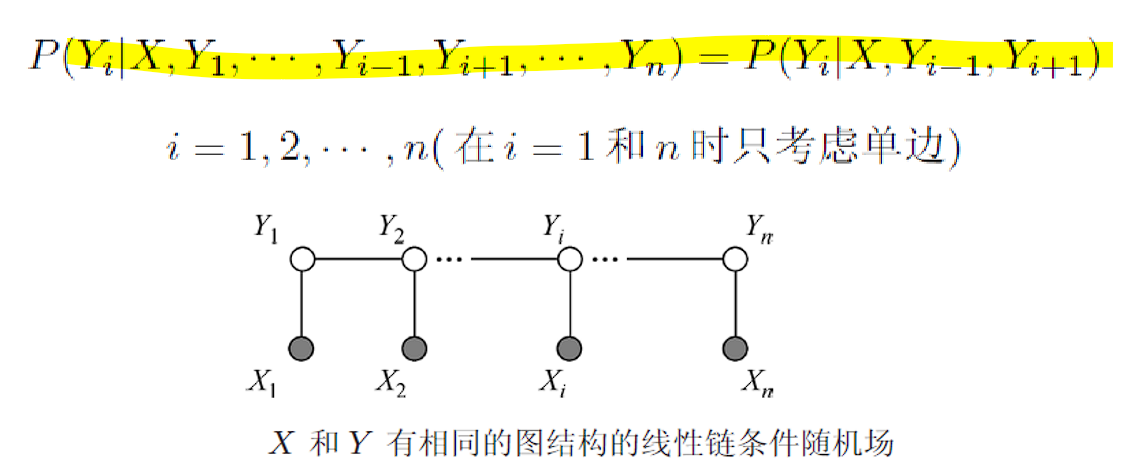

    - 其实就是上面这个特定结构下的条件随机场，相邻就是左边右边。

- 条件随机场的矩阵形式是什么？
    - 矩阵形式是为了方便对 $P_w(y|x)$ 这个标注序列的条件概率进行计算。
    - 每一个标记y有相同的取值可能数量m，为了搞定特征函数 $f_k(y_{i-1}, y_i, x, i)$ 的表达，主要问题在于 $y_{i-1}, y_i$ ，所以我们直接枚举出来搞成一个 m x m 的矩阵。
    - 具体而言，矩阵 $W_i(x)$ 的每个元素 $W_i(y_{i-1}, y_i | x) = W_i(x)_{y_{i-1}, y_i} = \sum_{k=1}^K w_k f_k(y_{i-1}, y_i, x, i)$， 是线性组合了特征函数之后的结果。
    - 而 $M_i(x) = \exp W_i(x)$ 是逐元素做了exp。
    - 我们本来计算  $P_w(y|x)$，非规范化的概率，只需要y自己这个已经确定的序列，对应的特征乘起来就可以了。
    - 为了做规范化，我们才搞了矩阵，目的就是为了让矩阵乘在一起，得到 $Z_w(x) = (M_1(x) M_2(x)\cdots M_{n+1}(x))[start, stop]$ 
    - start是新增加的y_0的状态，start具体的状态值使我们人为设定的，也是其他y的m个取值中的一个，比如说这一题就取了2；stop是$y_{n+1}$的取值。
    - 如下面的图(李航图11.6)所示
    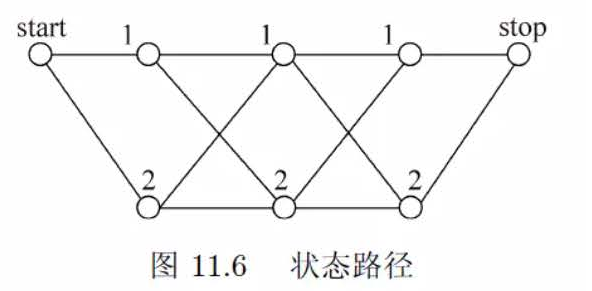

复习之后，我们发现本题是对例题11.2换成不同的M矩阵来求解。


In [3]:
import numpy as np

M1 = np.array([[0, 0],
               [0.5, 0.5]])

M2 = np.array([[0.3, 0.7],
               [0.7, 0.3]])

M3 = np.array([[0.5, 0.5],
               [0.6, 0.4]])

M4 = np.array([[0, 1],
               [0, 1]])
M = [M1, M2, M3, M4]

### 解题 {#sec-2-solution}


#### 解法一：手工推导结合Python计算（学习使用）

首先单个y的取值范围是{1, 2}, 所以状态路径的有 2**3 = 8 种可能。

In [8]:
import itertools
start = stop = 2
values = [1, 2]
all_y = list(itertools.product(values, repeat=3))
all_y = [(start, *y, stop) for y in all_y]
all_y

[(2, 1, 1, 1, 2),
 (2, 1, 1, 2, 2),
 (2, 1, 2, 1, 2),
 (2, 1, 2, 2, 2),
 (2, 2, 1, 1, 2),
 (2, 2, 1, 2, 2),
 (2, 2, 2, 1, 2),
 (2, 2, 2, 2, 2)]

比如，y=(1, 1, 1)， 要计算非规划化概率的话，那就要找到 $M_1$ 里面 从 start=2 转移到 1的势能，然后乘以 $M_2$ 里面 从 1 转移到 1的势能，然后乘以 $M_3$ 里面 从 1 转移到 1的势能，然后乘以 $M_4$ 里面 从 1 转移到 stop=2的势能，把这些势能乘在一起。

In [9]:
def compute_not_normalized(y=None):
    if y is None:
        y = [2, 1, 1, 1, 2]
    prod = 1
    for i in range(len(y)-1):
        prod *= M[i][y[i]-1, y[i+1]-1]
    return prod

In [10]:
not_normalized = [compute_not_normalized(y) for y in all_y]
not_normalized

[0.075, 0.075, 0.21, 0.13999999999999999, 0.175, 0.175, 0.09, 0.06]

然后我们求规范化因子。通过计算矩阵的乘积。

In [13]:
import functools
prod = functools.reduce(lambda A, B: A@B, M)
Z = prod[start-1, stop-1]
prod, Z

(array([[0., 0.],
        [0., 1.]]),
 1.0)

In [14]:
normalized = not_normalized/Z
normalized

array([0.075, 0.075, 0.21 , 0.14 , 0.175, 0.175, 0.09 , 0.06 ])

现在我们来找概率最大的状态序列。


In [17]:
best_y_index = np.argmax(normalized)
all_y[best_y_index], normalized[best_y_index]

((2, 1, 2, 1, 2), 0.21)

可见 (1, 2, 1) 是概率最大的状态序列，概率为0.21。

### 扩展问题：与概率无向图有关的机器学习库有哪些？


首先我们了解一下，概率建模有关的Python库有哪些？

- Pyro：基于Python和PyTorch的概率编程库，采用随机变分推理技术，适用于处理复杂的模型和大规模数据集。

- PyMC3：Python包用于贝叶斯统计建模，专注于高级MCMC和变分推断算法，适用于一系列问题。

- Edward：由Google开发的基于TensorFlow的概率编程库，用于概率建模和不确定性量化。

- Stan：开源项目用于贝叶斯统计建模和概率编程，允许用户编写模型，并使用MCMC等方法进行拟合。

- Pomegranate：功能强大且易于使用的概率建模工具包，支持多种模型，包括隐马尔可夫模型。

- pgmpy：这是一个Python库，用于构建和操作概率图模型（PGMs），包括贝叶斯网络和马尔可夫随机场。它提供参数学习、推理（包括精确和近似推理）以及模型可视化等功能。

- pyAgrum：pyAgrum是C++库aGrUM的Python接口，专注于贝叶斯网络和其他概率图模型。它支持创建、建模、学习、使用、计算和嵌入贝叶斯网络等任务，同时提供了一些特有的Python和C++代码以简化和扩展aGrUM API。

- Dynamax：这是一个允许轻松定义状态空间模型的库。使用Dynamax，可以进行最大似然估计或使用Blackjax进行MCMC全贝叶斯后验估计。

- Blackjax：这是一个基于JAX的概率库，用于贝叶斯推断，特别是使用哈密顿蒙特卡洛（HMC）或序贯蒙特卡洛（SMC）方法计算参数后验。

其中初步调查发现，pympy 和 Pomegranate 这两个库支持马尔科夫随机场。


这些库里面一些内容我们还没学到，比如文档经常会出现一个概念——状态空间模型 (State Space Model)，以及MCMC (Markov Chain Monte Carlo)。有空需要了解一下这些概念。


In [74]:
#| hide
import nbdev; nbdev.nbdev_export()